In [2]:
import os
os.environ['USE_PYGEOS'] = '0'

In [3]:
import geopandas as gpd
from  fiona import listlayers

In [4]:
worldMaps='https://github.com/ThayraSosa/geodfprepro/raw/main/maps/worldMaps.gpkg'
listlayers(worldMaps)

['states', 'rivers', 'lakes', 'capitals']

In [5]:
states=gpd.read_file(worldMaps,layer='states')
capitals=gpd.read_file(worldMaps,layer='capitals')
rivers=gpd.read_file(worldMaps,layer='rivers')

In [6]:
states.crs.to_epsg()==capitals.crs.to_epsg()==rivers.crs.to_epsg()

True

In [7]:
#Nos quedamos solo con texas
texas=states[states.STATE_NAME=='Texas']

In [8]:
texas_capitals = gpd.clip(gdf=capitals,mask=texas)
texas_rivers = gpd.clip(gdf=rivers,mask=texas)

<Axes: >

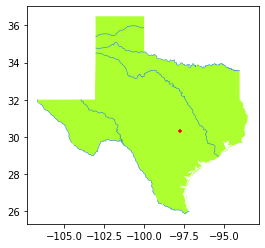

In [9]:
base = texas.plot(facecolor="greenyellow")
texas_rivers.plot(edgecolor='#1075F5', linewidth=0.5,ax=base)
texas_capitals.plot(marker='+', color='red', markersize=15,ax=base)

In [10]:
#EJERCICIO 1
texas.crs.axis_info #Nos permite ver que CRS utiliza texas

[Axis(name=Geodetic latitude, abbrev=Lat, direction=north, unit_auth_code=EPSG, unit_code=9122, unit_name=degree),
 Axis(name=Geodetic longitude, abbrev=Lon, direction=east, unit_auth_code=EPSG, unit_code=9122, unit_name=degree)]

In [11]:
#Hallamos el centroide de Texas
texas.centroid

<ipython-input-11-688e34264504>:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  texas.centroid


39 POINT (-99.35210 31.49116)
dtype: geometry

In [12]:
#El CRS recomendado para USA es el 3081
texas.to_crs(3081).crs.axis_info

[Axis(name=Easting, abbrev=X, direction=east, unit_auth_code=EPSG, unit_code=9001, unit_name=metre),
 Axis(name=Northing, abbrev=Y, direction=north, unit_auth_code=EPSG, unit_code=9001, unit_name=metre)]

In [13]:
texas.to_crs(3081).centroid

39 POINT (1063943.642 1034241.893)
dtype: geometry

In [14]:
#Reseteamos el CRS de texas y de los demas mapas
texas_3081=texas.to_crs(3081)


capitals_3081=capitals.to_crs(texas_3081.crs)
capitals_3081=capitals_3081[capitals_3081.STATE_NAME=='Texas']

rivers_3081=rivers.to_crs(texas_3081.crs)
rivers_3081=gpd.clip(gdf=rivers_3081,mask=texas_3081)

<ipython-input-15-8205c666a469>:12: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  texas.centroid.plot(color='red',ax=ax2)


<Axes: title={'center': 'unprojected'}>

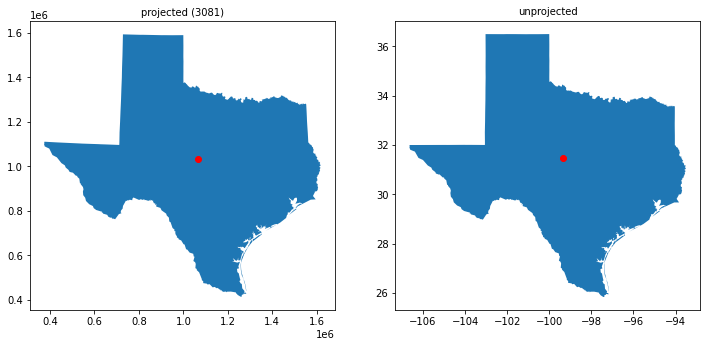

In [15]:
#Ahora graficamos ambos mapas, el del antiguo crs y el actualizado
from matplotlib import pyplot

fig, (ax1, ax2) = pyplot.subplots(ncols=2, sharex=False, sharey=False, figsize=(12,12))

ax1.set_title('projected (3081)',fontsize=10)
texas_3081.plot(ax=ax1)
texas_3081.centroid.plot(color='red',ax=ax1)

ax2.set_title('unprojected',fontsize=10)
texas.plot(ax=ax2)
texas.centroid.plot(color='red',ax=ax2)

<Axes: >

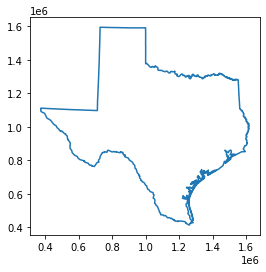

In [16]:
#EJERCICIO 2
texas_3081.boundary
#Seleccionamos solo el borde de Texas
texas_3081.boundary.plot()

In [17]:
type(texas_3081.boundary)
#Notamos que no se trata de un Geodataframe sino de una Geoserie

geopandas.geoseries.GeoSeries

In [18]:
#Lo convertimos a Geodataframe y lo guardamos
texas_3081DF=texas_3081.boundary.to_frame() 

In [19]:
#Modificamos algunas cosas del Geodatframe de manera que sea más completo
texas_3081DF['name']='Texas' #Agregamos una columna 

texas_3081DF.rename(columns={0:'geometry'},inplace=True) 
texas_3081DF = texas_3081DF.set_geometry("geometry")

#Verificamos:
texas_3081DF.crs

<Projected CRS: EPSG:3081>
Name: NAD83 / Texas State Mapping System
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: United States (USA) - Texas.
- bounds: (-106.66, 25.83, -93.5, 36.5)
Coordinate Operation:
- name: Texas State Mapping System (meters)
- method: Lambert Conic Conformal (2SP)
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [20]:
#EJERCICIO 3
#Vamos  a verificar quw todos nuestros GDF tengan un crs
texas_capitals.crs, texas_rivers.crs
#Notamos que si tienen crs

(<Geographic 2D CRS: EPSG:4326>
 Name: WGS 84
 Axis Info [ellipsoidal]:
 - Lat[north]: Geodetic latitude (degree)
 - Lon[east]: Geodetic longitude (degree)
 Area of Use:
 - name: World.
 - bounds: (-180.0, -90.0, 180.0, 90.0)
 Datum: World Geodetic System 1984 ensemble
 - Ellipsoid: WGS 84
 - Prime Meridian: Greenwich,
 <Geographic 2D CRS: EPSG:4326>
 Name: WGS 84
 Axis Info [ellipsoidal]:
 - Lat[north]: Geodetic latitude (degree)
 - Lon[east]: Geodetic longitude (degree)
 Area of Use:
 - name: World.
 - bounds: (-180.0, -90.0, 180.0, 90.0)
 Datum: World Geodetic System 1984 ensemble
 - Ellipsoid: WGS 84
 - Prime Meridian: Greenwich)

In [21]:
#Descargamos un shapefile de los lugares populados de Texas
texas_PopulatedPlaces=gpd.read_file(os.path.join("maps","hotosm_usa_texas_populated_places_points_shp","hotosm_usa_texas_populated_places_points.shp"))

In [22]:
texas_PopulatedPlaces.crs
#Notamos que tambien tiene crs, lo cambiaremos al crs recomendado

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [23]:
texas_PopulatedPlaces_3081=texas_PopulatedPlaces.to_crs(3081)

<Axes: title={'center': 'Below_Centroid, RightOf_Centroid'}>

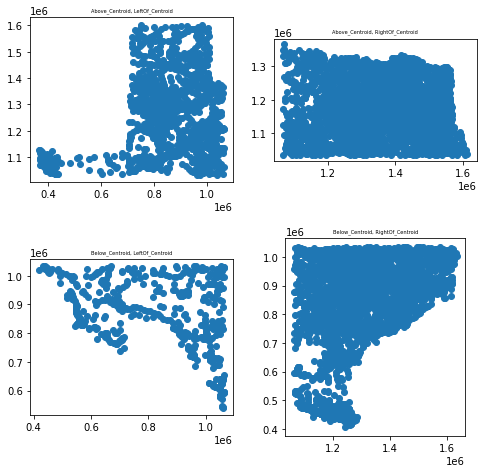

In [24]:
#EJERCICIO 4
centroTexas=texas_3081.centroid

fig, axs = pyplot.subplots(nrows=2,ncols=2,sharex=False, sharey=False,figsize=(8,8))

axs[0,0].set_title('Above_Centroid, LeftOf_Centroid',fontsize=5)
texas_PopulatedPlaces_3081.cx[:centroTexas.x,centroTexas.y:].plot(ax=axs[0,0]) 

axs[0,1].set_title('Above_Centroid, RightOf_Centroid',fontsize=5)
texas_PopulatedPlaces_3081.cx[centroTexas.x:,centroTexas.y:].plot(ax=axs[0,1]) 

axs[1,0].set_title('Below_Centroid, LeftOf_Centroid',fontsize=5)
texas_PopulatedPlaces_3081.cx[:centroTexas.x,:centroTexas.y].plot(ax=axs[1,0]) 

axs[1,1].set_title('Below_Centroid, RightOf_Centroid',fontsize=5)
texas_PopulatedPlaces_3081.cx[centroTexas.x:,:centroTexas.y].plot(ax=axs[1,1]) 

In [25]:
#Guardamos solo la parte superior izquierda
Texas_topLeft=texas_PopulatedPlaces_3081.cx[:centroTexas.x,centroTexas.y:].dissolve()
# you get
Texas_topLeft

,geometry,osm_id,name,population,source,is_in,place
0,"MULTIPOINT (366320.299 1128695.095, 366760.468...",50688894.0,El Paso,678815,https://www.census.gov/quickfacts/fact/table/s...,"Yoakum,Texas,Tex.,TX,USA",city


<Axes: >

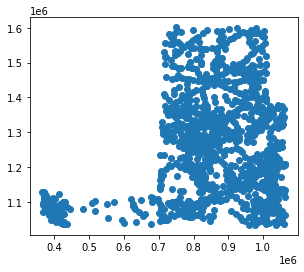

In [26]:
#Graficamos entonces solo la parte superior izquierda
Texas_topLeft.plot()

In [27]:
rowsCX=(texas_PopulatedPlaces_3081.cx[:centroTexas.x,centroTexas.y:].shape[0],\
texas_PopulatedPlaces_3081.cx[centroTexas.x:,centroTexas.y:].shape[0],\
texas_PopulatedPlaces_3081.cx[:centroTexas.x,:centroTexas.y].shape[0],\
texas_PopulatedPlaces_3081.cx[centroTexas.x:,:centroTexas.y].shape[0])
sum(rowsCX)

8513

In [28]:
sum(rowsCX)-texas_PopulatedPlaces_3081.shape[0]
#No hay ningun duplicado

0

In [29]:
#EJERCICIO 5
#Descargamos el archivo de aeropuertos en USA en csv
import pandas as pd 
infoairports=pd.read_csv(os.path.join("data","us-airports.csv"))

infoairports.iloc[[0,1,2,3,-4,-3,-2,-1],:] #Mostramos algunos datos iniciales y finales

,id,ident,type,name,latitude_deg,longitude_deg,elevation_ft,continent,country_name,iso_country,...,municipality,scheduled_service,gps_code,iata_code,local_code,home_link,wikipedia_link,keywords,score,last_updated
0,#meta +id,#meta +code,#loc +airport +type,#loc +airport +name,#geo +lat,#geo +lon,#geo +elevation +ft,#region +continent +code,#country +name,#country +code +iso2,...,#loc +municipality +name,#status +scheduled,#loc +airport +code +gps,#loc +airport +code +iata,#loc +airport +code +local,#meta +url +airport,#meta +url +wikipedia,#meta +keywords,#meta +score,#date +updated
1,3632,KLAX,large_airport,Los Angeles / Tom Bradley International Airport,33.942501,-118.407997,125,NaN,United States,US,...,Los Angeles,1,KLAX,LAX,LAX,https://www.flylax.com/,https://en.wikipedia.org/wiki/Los_Angeles_Inte...,NaN,1335475,2023-05-20T21:11:41+00:00
2,3754,KORD,large_airport,Chicago O'Hare International Airport,41.9786,-87.9048,672,NaN,United States,US,...,Chicago,1,KORD,ORD,ORD,https://www.flychicago.com/ohare/home/pages/de...,https://en.wikipedia.org/wiki/O'Hare_Internati...,"CHI, Orchard Place",1503175,2018-09-16T02:35:35+00:00
3,3622,KJFK,large_airport,John F Kennedy International Airport,40.639447,-73.779317,13,NaN,United States,US,...,New York,1,KJFK,JFK,JFK,https://www.jfkairport.com/,https://en.wikipedia.org/wiki/John_F._Kennedy_...,"Manhattan, New York City, NYC, Idlewild, IDL, ...",1052075,2022-10-18T18:49:55+00:00
30241,322813,US-0527,heliport,AdventHealth Zephyrhills Heliport,28.261934,-82.185663,160,NaN,United States,US,...,Zephyrhills,0,FD75,NaN,FD75,NaN,NaN,Florida Hospital Zephyrhills Heliport,0,2021-06-11T17:55:06+00:00
30242,324916,US-0652,heliport,Rotary Run Heliport,40.605805,-81.415002,1027,NaN,United States,US,...,Zoar,0,NaN,NaN,0OH2,NaN,NaN,NaN,0,2017-09-09T20:04:27+00:00
30243,327838,US-0874,heliport,Black Rock Heliport,35.084975,-108.78835,6454,NaN,United States,US,...,Zuni,0,NaN,NaN,NM1,NaN,NaN,NaN,0,2018-05-15T23:12:01+00:00
30244,336215,US-1675,closed,Zzyzx Airstrip,35.143373,-116.107035,NaN,NaN,United States,US,...,Zzyzx,0,NaN,NaN,NaN,NaN,NaN,NaN,0,2020-09-28T10:17:31+00:00


In [30]:
#Notamos que la primera fila no son aeropuertos, así que la eliminamos
infoairports.drop(index=0,inplace=True)
infoairports.reset_index(drop=True, inplace=True)
infoairports.head()

,id,ident,type,name,latitude_deg,longitude_deg,elevation_ft,continent,country_name,iso_country,...,municipality,scheduled_service,gps_code,iata_code,local_code,home_link,wikipedia_link,keywords,score,last_updated
0,3632,KLAX,large_airport,Los Angeles / Tom Bradley International Airport,33.942501,-118.407997,125,NaN,United States,US,...,Los Angeles,1,KLAX,LAX,LAX,https://www.flylax.com/,https://en.wikipedia.org/wiki/Los_Angeles_Inte...,NaN,1335475,2023-05-20T21:11:41+00:00
1,3754,KORD,large_airport,Chicago O'Hare International Airport,41.9786,-87.9048,672,NaN,United States,US,...,Chicago,1,KORD,ORD,ORD,https://www.flychicago.com/ohare/home/pages/de...,https://en.wikipedia.org/wiki/O'Hare_Internati...,"CHI, Orchard Place",1503175,2018-09-16T02:35:35+00:00
2,3622,KJFK,large_airport,John F Kennedy International Airport,40.639447,-73.779317,13,NaN,United States,US,...,New York,1,KJFK,JFK,JFK,https://www.jfkairport.com/,https://en.wikipedia.org/wiki/John_F._Kennedy_...,"Manhattan, New York City, NYC, Idlewild, IDL, ...",1052075,2022-10-18T18:49:55+00:00
3,3384,KATL,large_airport,Hartsfield Jackson Atlanta International Airport,33.6367,-84.428101,1026,NaN,United States,US,...,Atlanta,1,KATL,ATL,ATL,http://www.atlanta-airport.com/,https://en.wikipedia.org/wiki/Hartsfield–Jacks...,NaN,2002475,2018-09-19T14:50:01+00:00
4,3878,KSFO,large_airport,San Francisco International Airport,37.61899948120117,-122.375,13,NaN,United States,US,...,San Francisco,1,KSFO,SFO,SFO,http://www.flysfo.com/,https://en.wikipedia.org/wiki/San_Francisco_In...,"QSF, QBA",1112475,2008-06-13T14:30:04+00:00


In [31]:
infoairports=infoairports[infoairports.region_name=='Texas']
#Nos quedamos solo con la parte de Texas

In [32]:
infoairports.columns.to_list()

['id',
 'ident',
 'type',
 'name',
 'latitude_deg',
 'longitude_deg',
 'elevation_ft',
 'continent',
 'country_name',
 'iso_country',
 'region_name',
 'iso_region',
 'local_region',
 'municipality',
 'scheduled_service',
 'gps_code',
 'iata_code',
 'local_code',
 'home_link',
 'wikipedia_link',
 'keywords',
 'score',
 'last_updated']

In [33]:
#Nos quedamos solo con las columnas que nos interesan
keep=['name','type','latitude_deg', 'longitude_deg','elevation_ft','region_name','municipality']
infoairports=infoairports.loc[:,keep]

In [34]:
infoairports.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3649 entries, 6 to 30235
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           3649 non-null   object
 1   type           3649 non-null   object
 2   latitude_deg   3649 non-null   object
 3   longitude_deg  3649 non-null   object
 4   elevation_ft   3342 non-null   object
 5   region_name    3649 non-null   object
 6   municipality   3646 non-null   object
dtypes: object(7)
memory usage: 228.1+ KB


In [35]:
numericCols=['latitude_deg', 'longitude_deg','elevation_ft']
infoairports[numericCols]=infoairports.loc[:,numericCols].apply(lambda x:pd.to_numeric(x))

infoairports.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3649 entries, 6 to 30235
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           3649 non-null   object 
 1   type           3649 non-null   object 
 2   latitude_deg   3649 non-null   float64
 3   longitude_deg  3649 non-null   float64
 4   elevation_ft   3342 non-null   float64
 5   region_name    3649 non-null   object 
 6   municipality   3646 non-null   object 
dtypes: float64(3), object(4)
memory usage: 228.1+ KB


In [36]:
infoairports.head()

,name,type,latitude_deg,longitude_deg,elevation_ft,region_name,municipality
6,Dallas Fort Worth International Airport,large_airport,32.896801,-97.038002,607.0,Texas,Dallas-Fort Worth
18,George Bush Intercontinental Houston Airport,large_airport,29.984400,-95.341400,97.0,Texas,Houston
34,Austin Bergstrom International Airport,large_airport,30.197535,-97.662015,542.0,Texas,Austin
41,San Antonio International Airport,large_airport,29.533701,-98.469803,809.0,Texas,San Antonio
43,William P Hobby Airport,medium_airport,29.645399,-95.278900,46.0,Texas,Houston


<Axes: xlabel='longitude_deg', ylabel='latitude_deg'>

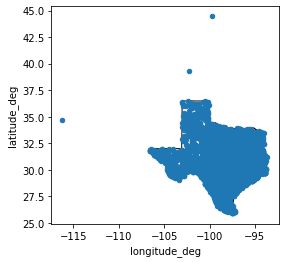

In [37]:
base = texas.plot(color='white', edgecolor='black') #No proyectado

infoairports.plot.scatter(x = 'longitude_deg', y = 'latitude_deg',ax=base)

In [38]:
airports=gpd.GeoDataFrame(data=infoairports.copy(),
                 geometry=gpd.points_from_xy(infoairports.longitude_deg,
                                             infoairports.latitude_deg), 
                 crs=texas.crs.to_epsg())

<Axes: >

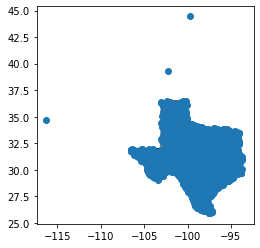

In [39]:
base = texas.plot(color='white', edgecolor='black')
airports.plot(ax=base)

<Axes: >

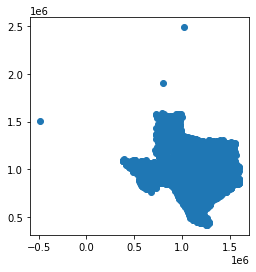

In [40]:
airports.to_crs(3081).plot()

In [41]:
airports_3081=airports.to_crs(3081)

In [42]:
airports_3081.rename(columns={'type':'kind'},inplace=True) #Cambiamos el nombre de la columna type por kind

In [43]:
airports_3081['kind'].value_counts()
#Podemos clasificar los aeropuertos segun un  tipo o clase

small_airport 1785
closed 1009
heliport 792
medium_airport 53
large_airport 4
balloonport 3
seaplane_base 3
Name: kind, dtype: int64

In [44]:
#Para diferenciarlos les asignamos un color a cada uno
from folium import LayerControl


m = airports_3081[airports_3081.kind=='small_airport'].explore(color="red",name="small",show=False)
m = airports_3081[airports_3081.kind=='medium_airport'].explore(m=m, color="blue",name="medium",show=False)
m = airports_3081[airports_3081.kind=='large_airport'].explore(m=m, color="black",name="large",show=True)
m = airports_3081[airports_3081.kind=='seaplane_base'].explore(m=m, color="green",name="seaplane",show=False)
m = airports_3081[airports_3081.kind=='closed'].explore(m=m, color="greenyellow",name="closed",show=False)
m = airports_3081[airports_3081.kind=='heliport'].explore(m=m, color="orange",name="heliport",show=False)

LayerControl(collapsed=False).add_to(m) #optional

m

Make this Notebook Trusted to load map: File -> Trust Notebook <iframe srcdoc="<!DOCTYPE html>
<html>
<head>
 
 <meta http-equiv="content-type" content="text/html; charset=UTF-8" />
 
 <script>
 L_NO_TOUCH = false;
 L_DISABLE_3D = false;
 </script>
 
 <style>html, body {width: 100%;height: 100%;margin: 0;padding: 0;}</style>
 <style>#map {position:absolute;top:0;bottom:0;right:0;left:0;}</style>
 <script src="https://cdn.jsdelivr.net/npm/leaflet@1.9.3/dist/leaflet.js"></script>
 <script src="https://code.jquery.com/jquery-1.12.4.min.js"></script>
 <script src="https://cdn.jsdelivr.net/npm/bootstrap@5.2.2/dist/js/bootstrap.bundle.min.js"></script>
 <script src="https://cdnjs.cloudflare.com/ajax/libs/Leaflet.awesome-markers/2.0.2/leaflet.awesome-markers.js"></script>
 <link rel="stylesheet" href="https://cdn.jsdelivr.net/npm/leaflet@1.9.3/dist/leaflet.css"/>
 <link rel="stylesheet" href="https://cdn.jsdelivr.net/npm/bootstrap@5.2.2/dist/css/bootstrap.min.css"/>
 <link rel="stylesheet" href="https://netdna.bootstrapcdn.com/bootstrap/3.0.0/css/bootstrap.min.css"/>
 <link rel="stylesheet" href="https://cdn.jsdelivr.net/npm/@fortawesome/fontawesome-free@6.2.0/css/all.min.css"/>
 <link rel="stylesheet" href="https://cdnjs.cloudflare.com/ajax/libs/Leaflet.awesome-markers/2.0.2/leaflet.awesome-markers.css"/>
 <link rel="stylesheet" href="https://cdn.jsdelivr.net/gh/python-visualization/folium/folium/templates/leaflet.awesome.rotate.min.css"/>
 
 <meta name="viewport" content="width=device-width,
 initial-scale=1.0, maximum-scale=1.0, user-scalable=no" />
 <style>
 #map_e33c59db6a9d27c71eb9e694a28cdb59 {
 position: relative;
 width: 100.0%;
 height: 100.0%;
 left: 0.0%;
 top: 0.0%;
 }
 .leaflet-container { font-size: 1rem; }
 </style>
 
 
 <style>
 .foliumtooltip {
 
 }
 .foliumtooltip table{
 margin: auto;
 }
 .foliumtooltip tr{
 text-align: left;
 }
 .foliumtooltip th{
 padding: 2px; padding-right: 8px;
 }
 </style>
 
 
 <style>
 .foliumtooltip {
 
 }
 .foliumtooltip table{
 margin: auto;
 }
 .foliumtooltip tr{
 text-align: left;
 }
 .foliumtooltip th{
 padding: 2px; padding-right: 8px;
 }
 </style>
 
 
 <style>
 .foliumtooltip {
 
 }
 .foliumtooltip table{
 margin: auto;
 }
 .foliumtooltip tr{
 text-align: left;
 }
 .foliumtooltip th{
 padding: 2px; padding-right: 8px;
 }
 </style>
 
 
 <style>
 .foliumtooltip {
 
 }
 .foliumtooltip table{
 margin: auto;
 }
 .foliumtooltip tr{
 text-align: left;
 }
 .foliumtooltip th{
 padding: 2px; padding-right: 8px;
 }
 </style>
 
 
 <style>
 .foliumtooltip {
 
 }
 .foliumtooltip table{
 margin: auto;
 }
 .foliumtooltip tr{
 text-align: left;
 }
 .foliumtooltip th{
 padding: 2px; padding-right: 8px;
 }
 </style>
 
 
 <style>
 .foliumtooltip {
 
 }
 .foliumtooltip table{
 margin: auto;
 }
 .foliumtooltip tr{
 text-align: left;
 }
 .foliumtooltip th{
 padding: 2px; padding-right: 8px;
 }
 </style>
 
</head>
<body>
 
 
 <div class="folium-map" id="map_e33c59db6a9d27c71eb9e694a28cdb59" ></div>
 
</body>
<script>
 
 
 var map_e33c59db6a9d27c71eb9e694a28cdb59 = L.map(
 "map_e33c59db6a9d27c71eb9e694a28cdb59",
 {
 center: [31.295664981689438, -99.952764],
 crs: L.CRS.EPSG3857,
 zoom: 10,
 zoomControl: true,
 preferCanvas: false,
 }
 );
 L.control.scale().addTo(map_e33c59db6a9d27c71eb9e694a28cdb59);

 

 
 
 var tile_layer_1d432f442483fa38475709db7dafb739 = L.tileLayer(
 "https://{s}.tile.openstreetmap.org/{z}/{x}/{y}.png",
 {"attribution": "Data by \u0026copy; \u003ca target=\"_blank\" href=\"http://openstreetmap.org\"\u003eOpenStreetMap\u003c/a\u003e, under \u003ca target=\"_blank\" href=\"http://www.openstreetmap.org/copyright\"\u003eODbL\u003c/a\u003e.", "detectRetina": false, "maxNativeZoom": 18, "maxZoom": 18, "minZoom": 0, "noWrap": false, "opacity": 1, "subdomains": "abc", "tms": false}
 ).addTo(map_e33c59db6a9d27c71eb9e694a28cdb59);
 
 
 map_e33c59db6a9d27c71eb9e694a28cdb59.fitBounds(
 [[26.082929999999998, -106.203631], [36.50839996337888, -93.701897]],
 {}
 );
 
 
 function geo_json_a0ef2af5725a

In [45]:
airports_3081.to_file(os.path.join("maps","texasMaps_3081.gpkg"),layer='airports', driver="GPKG") #Guardamos la capa

In [46]:
#EJERCICIO 6
#Seleccionamos los puntos de aeropuertos pequeños
small_airport=airports_3081[airports_3081.kind=='small_airport']
# several rows
small_airport

,name,kind,latitude_deg,longitude_deg,elevation_ft,region_name,municipality,geometry
181,Addison Airport,small_airport,32.968601,-96.836403,644.0,Texas,Dallas,POINT (1295224.677 1203640.157)
241,David Wayne Hooks Memorial Airport,small_airport,30.061800,-95.552803,152.0,Texas,Houston,POINT (1427880.815 886365.630)
267,Dallas Executive Airport,small_airport,32.680901,-96.868202,660.0,Texas,Dallas,POINT (1293159.540 1171717.109)
407,Georgetown Municipal Airport,small_airport,30.677543,-97.678524,790.0,Texas,Georgetown,POINT (1221971.938 948215.613)
421,McKinney National Airport,small_airport,33.177898,-96.590500,585.0,Texas,Dallas,POINT (1317451.032 1227486.145)
...,...,...,...,...,...,...,...,...
18247,Senisa Ranch Airport,small_airport,29.128630,-99.248820,694.0,Texas,Yancey,POINT (1072993.766 774753.882)
18250,Marlin's Meadow Airport,small_airport,32.953889,-95.577500,490.0,Texas,Yantis,POINT (1412716.044 1206040.177)
18272,Pearson Ranch Private Airport,small_airport,29.359567,-97.144353,350.0,Texas,Yoakum,POINT (1276801.016 803635.831)
18284,Yorktown Airport,small_airport,28.947800,-97.459999,240.0,Texas,Yorktown,POINT (1247256.998 757330.801)


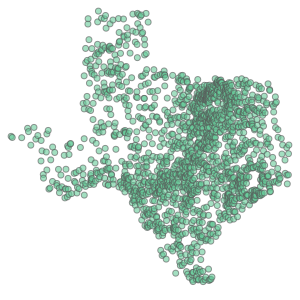

In [47]:
#Combinamos todos los puntos
small_airport.unary_union

In [48]:
gpd.GeoSeries(small_airport.unary_union)

0 MULTIPOINT (412559.334 1059832.931, 417444.056...
dtype: geometry

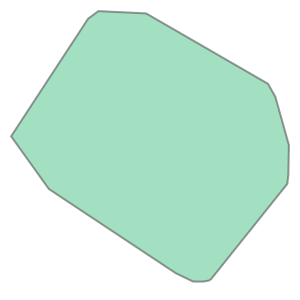

In [49]:
small_airport.unary_union.convex_hull

<Axes: >

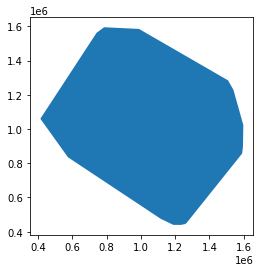

In [50]:
gpd.GeoSeries(small_airport.unary_union.convex_hull).plot()

In [51]:
#Ahora lo convertimos a un GDF
SmallAirport_hull=gpd.GeoSeries(small_airport.unary_union.convex_hull).to_frame()
SmallAirport_hull

,0
0,"POLYGON ((1232343.831 439468.331, 1189207.676 ..."


In [52]:
SmallAirport_hull.rename(columns={0:'geometry'},inplace=True)
SmallAirport_hull['name']='small airports hull' 
SmallAirport_hull=SmallAirport_hull.set_geometry('geometry')
SmallAirport_hull.crs="EPSG:3081"
# verificamos:
SmallAirport_hull.crs

<Projected CRS: EPSG:3081>
Name: NAD83 / Texas State Mapping System
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: United States (USA) - Texas.
- bounds: (-106.66, 25.83, -93.5, 36.5)
Coordinate Operation:
- name: Texas State Mapping System (meters)
- method: Lambert Conic Conformal (2SP)
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

<Axes: >

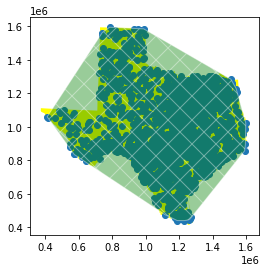

In [53]:
#Lo graficamos
base=texas_3081.plot(facecolor='yellow')
small_airport.plot(ax=base)
SmallAirport_hull.plot(ax=base,facecolor='green',
                       edgecolor='white',alpha=0.4,
                       hatch='X')

In [54]:
#Podemos observar el hull en Texas
SmallAirport_hull.explore()

Make this Notebook Trusted to load map: File -> Trust Notebook <iframe srcdoc="<!DOCTYPE html>
<html>
<head>
 
 <meta http-equiv="content-type" content="text/html; charset=UTF-8" />
 
 <script>
 L_NO_TOUCH = false;
 L_DISABLE_3D = false;
 </script>
 
 <style>html, body {width: 100%;height: 100%;margin: 0;padding: 0;}</style>
 <style>#map {position:absolute;top:0;bottom:0;right:0;left:0;}</style>
 <script src="https://cdn.jsdelivr.net/npm/leaflet@1.9.3/dist/leaflet.js"></script>
 <script src="https://code.jquery.com/jquery-1.12.4.min.js"></script>
 <script src="https://cdn.jsdelivr.net/npm/bootstrap@5.2.2/dist/js/bootstrap.bundle.min.js"></script>
 <script src="https://cdnjs.cloudflare.com/ajax/libs/Leaflet.awesome-markers/2.0.2/leaflet.awesome-markers.js"></script>
 <link rel="stylesheet" href="https://cdn.jsdelivr.net/npm/leaflet@1.9.3/dist/leaflet.css"/>
 <link rel="stylesheet" href="https://cdn.jsdelivr.net/npm/bootstrap@5.2.2/dist/css/bootstrap.min.css"/>
 <link rel="stylesheet" href="https://netdna.bootstrapcdn.com/bootstrap/3.0.0/css/bootstrap.min.css"/>
 <link rel="stylesheet" href="https://cdn.jsdelivr.net/npm/@fortawesome/fontawesome-free@6.2.0/css/all.min.css"/>
 <link rel="stylesheet" href="https://cdnjs.cloudflare.com/ajax/libs/Leaflet.awesome-markers/2.0.2/leaflet.awesome-markers.css"/>
 <link rel="stylesheet" href="https://cdn.jsdelivr.net/gh/python-visualization/folium/folium/templates/leaflet.awesome.rotate.min.css"/>
 
 <meta name="viewport" content="width=device-width,
 initial-scale=1.0, maximum-scale=1.0, user-scalable=no" />
 <style>
 #map_f280e5eb5ac988e097906e766839805a {
 position: relative;
 width: 100.0%;
 height: 100.0%;
 left: 0.0%;
 top: 0.0%;
 }
 .leaflet-container { font-size: 1rem; }
 </style>
 
 
 <style>
 .foliumtooltip {
 
 }
 .foliumtooltip table{
 margin: auto;
 }
 .foliumtooltip tr{
 text-align: left;
 }
 .foliumtooltip th{
 padding: 2px; padding-right: 8px;
 }
 </style>
 
</head>
<body>
 
 
 <div class="folium-map" id="map_f280e5eb5ac988e097906e766839805a" ></div>
 
</body>
<script>
 
 
 var map_f280e5eb5ac988e097906e766839805a = L.map(
 "map_f280e5eb5ac988e097906e766839805a",
 {
 center: [31.295664981689438, -99.952764],
 crs: L.CRS.EPSG3857,
 zoom: 10,
 zoomControl: true,
 preferCanvas: false,
 }
 );
 L.control.scale().addTo(map_f280e5eb5ac988e097906e766839805a);

 

 
 
 var tile_layer_6b33c9ffecc9568ea32dd5b987513d5d = L.tileLayer(
 "https://{s}.tile.openstreetmap.org/{z}/{x}/{y}.png",
 {"attribution": "Data by \u0026copy; \u003ca target=\"_blank\" href=\"http://openstreetmap.org\"\u003eOpenStreetMap\u003c/a\u003e, under \u003ca target=\"_blank\" href=\"http://www.openstreetmap.org/copyright\"\u003eODbL\u003c/a\u003e.", "detectRetina": false, "maxNativeZoom": 18, "maxZoom": 18, "minZoom": 0, "noWrap": false, "opacity": 1, "subdomains": "abc", "tms": false}
 ).addTo(map_f280e5eb5ac988e097906e766839805a);
 
 
 map_f280e5eb5ac988e097906e766839805a.fitBounds(
 [[26.082929999999998, -106.203631], [36.50839996337888, -93.701897]],
 {}
 );
 
 
 function geo_json_0585cade830fbb32df04e9719daa32fc_styler(feature) {
 switch(feature.id) {
 default:
 return {"fillOpacity": 0.5, "weight": 2};
 }
 }
 function geo_json_0585cade830fbb32df04e9719daa32fc_highlighter(feature) {
 switch(feature.id) {
 default:
 return {"fillOpacity": 0.75};
 }
 }
 function geo_json_0585cade830fbb32df04e9719daa32fc_pointToLayer(feature, latlng) {
 var opts = {"bubblingMouseEvents": true, "color": "#3388ff", "dashArray": null, "dashOffset": null, "fill": true, "fillColor": "#3388ff", "fillOpacity": 0.2, "fillRule": "evenodd", "lineCap": "round", "lineJoin": "round", "opacity": 1.0, "radius": 2, "stroke": true, "weight": 3};
 
 let style = geo_json_0585cade830fbb32df04e9719daa32fc_styler(feature)
 Object.assign(opts, style)
 
 return new L.CircleMarker(latlng, opts)
 }

 function geo_json_0585cade830fbb32df04e9719daa32fc_onEachFeature(feature, layer) {
 layer.on({
 mouseout: function(e) {
 if(typeof e.target.setStyle === "fu

In [55]:
#EJERCICIO 7
texas_PopulatedPlaces_3081[~texas_PopulatedPlaces_3081.is_valid]
#Notamos que no hay ningun válido

,osm_id,name,population,source,is_in,place,geometry


In [56]:
#Revisamos los otros mapas
texas_3081[~texas_3081.is_valid]

,STATE_NAME,STATE_FIPS,STATE_ABBR,geometry


In [57]:
capitals_3081[~capitals_3081.is_valid]

,CITY_NAME,STATE_NAME,geometry


In [58]:
rivers_3081[~rivers_3081.is_valid]

,NAME,SYSTEM,geometry


In [60]:
airports_3081[~airports_3081.is_valid]
#Todos los mapas tienen poligonos validos por lo tanto no es necesario corregirlos

,name,kind,latitude_deg,longitude_deg,elevation_ft,region_name,municipality,geometry
